### Data Understanding and Cleaning

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\MSI\\Desktop\\DSquares\\zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.info() # to check the data types of the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
df.shape # How many rows and columns (features and samples)

(51717, 17)

In [5]:
df.describe() # Summary of numerical variables, which is only votes here.

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [6]:
#Printing the null values
print(df.isnull().sum())

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


In [7]:
#Percentage of null values
print(df.isnull().sum()/df.shape[0]*100)

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64


#### Handling Missing Values and Duplicate Values

In [8]:
# We will drop the empty values in the 'location', 'cuisine' and 'rest_type' columns since their %age of missing values is very low
df.dropna(subset=['location'], inplace=True)
df.dropna(subset=['cuisines'], inplace=True)
df.dropna(subset=['rest_type'], inplace=True)

df.isnull().sum()



url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7686
votes                              0
phone                           1175
location                           0
rest_type                          0
dish_liked                     27897
cuisines                           0
approx_cost(for two people)      318
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
#Checking for duplicates
df.duplicated().sum()

0

#### Cleaning the unique rates column

In [10]:
def clean_rate(rate):
    if rate == 'NEW' or rate == '-':
        return np.nan
    else:
        rate = str(rate).split('/')[0]
        return float(rate)

df['rate'] = df['rate'].apply(clean_rate)
df['rate'].head()
#Looks better and cleaner now

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [11]:
#Missing Values of rate column will be filled with mean of the column

df['rate'].fillna(df['rate'].mean(), inplace=True)


In [12]:
unique_rates = df['rate'].unique()
print(unique_rates)
#We have Entries like 'NEW' and '-' which are not required, will replace them with NaN


[4.1        3.8        3.7        3.6        4.6        4.
 4.2        3.9        3.1        3.         3.2        3.3
 2.8        4.4        4.3        3.70215396 2.9        3.5
 2.6        3.4        4.5        2.5        2.7        4.7
 2.4        2.2        2.3        4.8        4.9        2.1
 2.         1.8       ]


#### Cleaning the approx_cost column

In [13]:
#We will now clean the 'approx_cost(for two people)' column
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [14]:
#There are values with ',' in them, we will remove them
def clean_cost(cost):
    if ',' in str(cost):
        cost = cost.replace(',', '')
        return float(cost)
    else:
        return float(cost)
    
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(clean_cost)
df['approx_cost(for two people)'].head()

#We have removed the ',' from the values and converted them to float

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: approx_cost(for two people), dtype: float64

#### Cleaning the rest_type column

In [15]:
rest_types = df['rest_type'].unique()
print(rest_types)

#Frequency of each rest_type
df['rest_type'].value_counts()


['Casual Dining' 'Cafe, Casual Dining' 'Quick Bites' 'Casual Dining, Cafe'
 'Cafe' 'Quick Bites, Cafe' 'Cafe, Quick Bites' 'Delivery' 'Mess'
 'Dessert Parlor' 'Bakery, Dessert Parlor' 'Pub' 'Bakery'
 'Takeaway, Delivery' 'Fine Dining' 'Beverage Shop' 'Sweet Shop' 'Bar'
 'Beverage Shop, Quick Bites' 'Confectionery' 'Quick Bites, Beverage Shop'
 'Dessert Parlor, Sweet Shop' 'Bakery, Quick Bites'
 'Sweet Shop, Quick Bites' 'Kiosk' 'Food Truck'
 'Quick Bites, Dessert Parlor' 'Beverage Shop, Dessert Parlor' 'Takeaway'
 'Pub, Casual Dining' 'Casual Dining, Bar' 'Dessert Parlor, Beverage Shop'
 'Quick Bites, Bakery' 'Dessert Parlor, Quick Bites'
 'Microbrewery, Casual Dining' 'Lounge' 'Bar, Casual Dining' 'Food Court'
 'Cafe, Bakery' 'Dhaba' 'Quick Bites, Sweet Shop' 'Microbrewery'
 'Food Court, Quick Bites' 'Pub, Bar' 'Casual Dining, Pub' 'Lounge, Bar'
 'Food Court, Dessert Parlor' 'Casual Dining, Sweet Shop'
 'Food Court, Casual Dining' 'Casual Dining, Microbrewery'
 'Sweet Shop, Dessert Pa

rest_type
Quick Bites                   19129
Casual Dining                 10326
Cafe                           3732
Delivery                       2595
Dessert Parlor                 2262
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

In [16]:
#Check the rest_types with less than 500 entries
rest_types_less_than_500 = df['rest_type'].value_counts()[df['rest_type'].value_counts() < 500]
print(rest_types_less_than_500)

#We will replace the rest_types with less than 500 entries with 'Others'
def clean_rest_type(rest_type):
    if rest_type in rest_types_less_than_500:
        return 'Others'
    else:
        return rest_type

df['rest_type'] = df['rest_type'].apply(clean_rest_type)
df['rest_type'].value_counts()


rest_type
Sweet Shop                    468
Bar, Casual Dining            425
Lounge                        396
Pub                           357
Fine Dining                   346
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Sweet Shop, Dessert Parlor      1
Quick Bites, Kiosk              1
Name: count, Length: 82, dtype: int64


rest_type
Quick Bites           19129
Casual Dining         10326
Others                 6907
Cafe                   3732
Delivery               2595
Dessert Parlor         2262
Takeaway, Delivery     2035
Casual Dining, Bar     1154
Bakery                 1141
Beverage Shop           865
Bar                     697
Food Court              623
Name: count, dtype: int64

#### Cleaning the Location column

In [17]:
#frequency of each location
df['location'].value_counts()

location
BTM                      5097
HSR                      2511
Koramangala 5th Block    2504
JP Nagar                 2222
Whitefield               2120
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

In [18]:
#Listing the unique locations
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [19]:
#Listing Locations.
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [20]:
#THey have the same cities/locations, we will drop the 'listed_in(city)' column
df = df.drop('listed_in(city)', axis=1)

df.shape

(51466, 16)

#### Cleaning the cuisines column


In [21]:
#Frequency of each cuisine
df['cuisines'].value_counts()

cuisines
North Indian                                       2899
North Indian, Chinese                              2361
South Indian                                       1828
Biryani                                             909
Bakery, Desserts                                    907
                                                   ... 
Chinese, Thai, Pan Asian                              1
North Eastern, Street Food                            1
Continental, North Indian, Chinese, Pizza, Thai       1
Chinese, North Indian, Street Food, Rolls             1
North Indian, Chinese, Arabian, Momos                 1
Name: count, Length: 2712, dtype: int64

In [22]:
#Listing the unique cuisines
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [23]:
#We have cuisines with only very few entries, we will replace them with 'Others'
cuisines_less_than_300 = df['cuisines'].value_counts()[df['cuisines'].value_counts() < 300]

def clean_cuisines(cuisines):
    if cuisines in cuisines_less_than_300:
        return 'Others'
    else:
        return cuisines

df['cuisines'] = df['cuisines'].apply(clean_cuisines)
df['cuisines'].value_counts()


cuisines
Others                                 35440
North Indian                            2899
North Indian, Chinese                   2361
South Indian                            1828
Biryani                                  909
Bakery, Desserts                         907
Fast Food                                803
Desserts                                 766
Cafe                                     756
South Indian, North Indian, Chinese      726
Bakery                                   649
Chinese                                  554
Ice Cream, Desserts                      417
Chinese, North Indian                    405
Mithai, Street Food                      363
Desserts, Ice Cream                      354
North Indian, Chinese, Biryani           348
South Indian, North Indian               343
North Indian, South Indian               333
North Indian, South Indian, Chinese      305
Name: count, dtype: int64

In [24]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                           1175
location                           0
rest_type                          0
dish_liked                     27897
cuisines                           0
approx_cost(for two people)      318
reviews_list                       0
menu_item                          0
listed_in(type)                    0
dtype: int64

In [25]:
#We will drop all other null values
# df.dropna(inplace=True)
df.shape

(51466, 16)

In [26]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                           1175
location                           0
rest_type                          0
dish_liked                     27897
cuisines                           0
approx_cost(for two people)      318
reviews_list                       0
menu_item                          0
listed_in(type)                    0
dtype: int64

#### Dealing with leftover missing values

In [27]:
#We will drop the phone number column since it is not required
df = df.drop(['phone'], axis=1)

#We will drop the dish_liked but keep a copy of it
dish_liked = df['dish_liked']
df = df.drop('dish_liked', axis=1)

#We will use the mean of the rate to fill in the missing values
df['rate'].fillna(df['rate'].mean(), inplace=True)

df.shape

(51466, 14)

In [28]:
df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].mean(), inplace=True)
df.isnull().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
dtype: int64

## Data Visualization

### Univariate Analysis

#### Bar for different locations

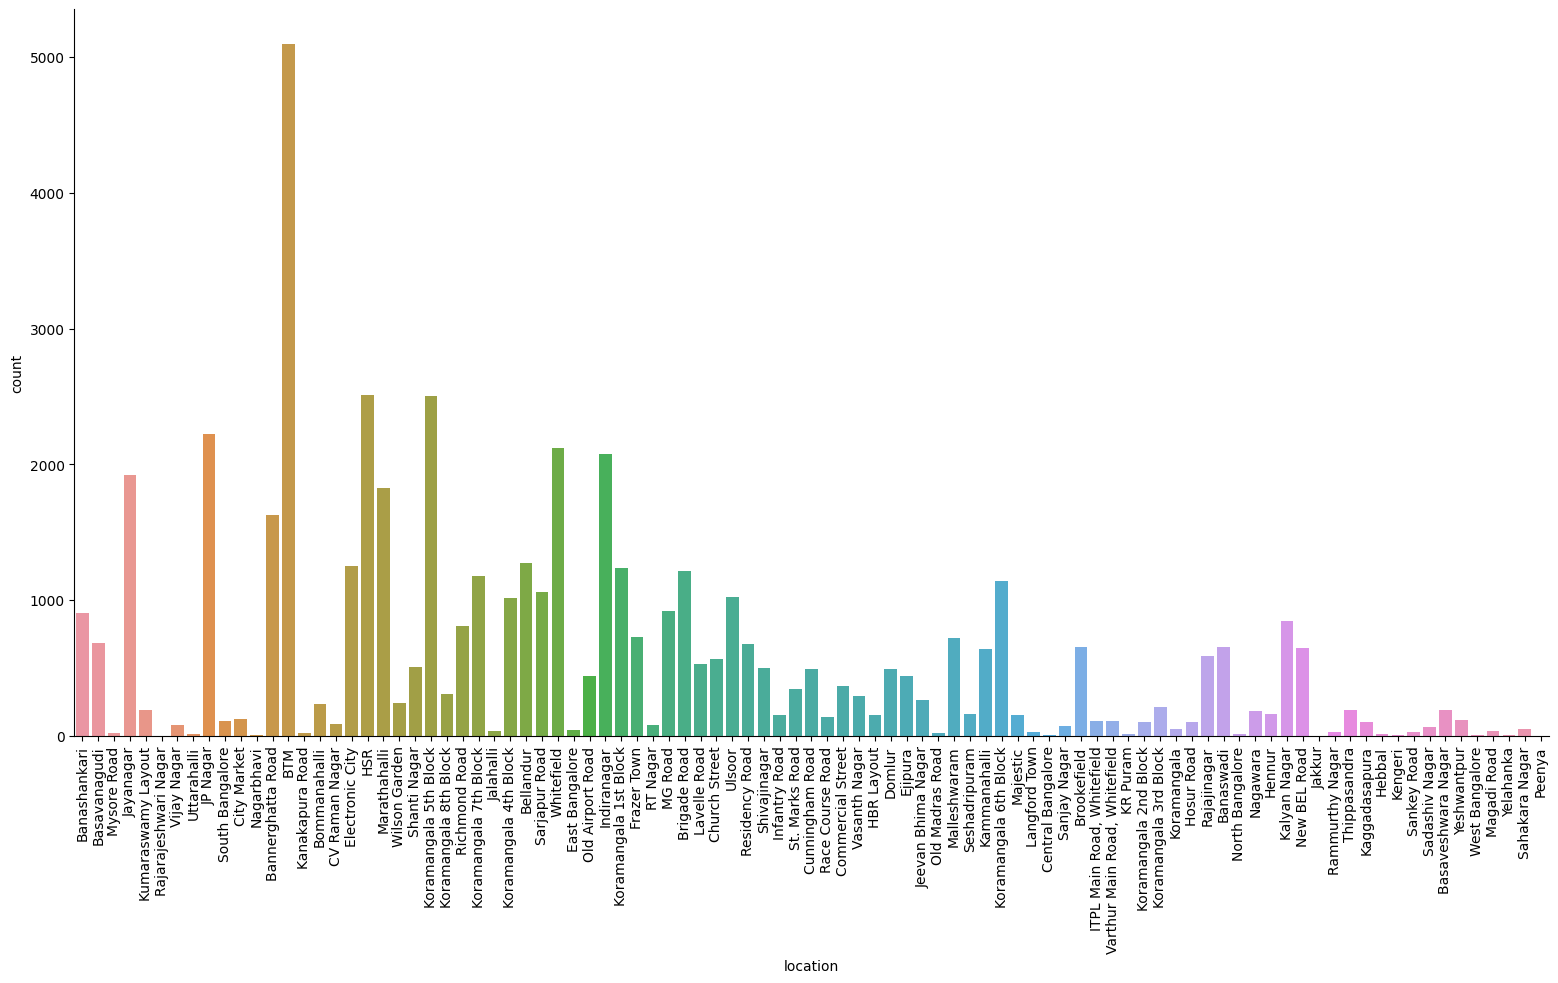

In [29]:
sns.catplot(x='location', kind='count', data=df, height=8, aspect=2)
plt.xticks(rotation=90)
plt.show()

#### Visualizing the rating distribution

C:\Users\MSI\AppData\Local\Temp\ipykernel_7232\464710422.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rate'])


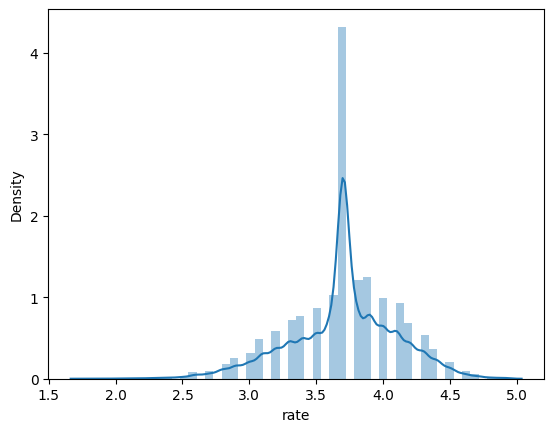

In [30]:
sns.distplot(df['rate'])
plt.show()


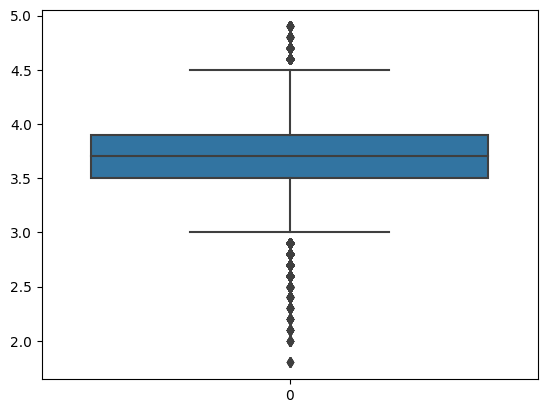

In [31]:
#boxplot for rate
sns.boxplot(df['rate'])
plt.show()

#### Visualing the votes column

C:\Users\MSI\AppData\Local\Temp\ipykernel_7232\1222600097.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['votes'], kde=True, hist=True, kde_kws={'linewidth': 5})


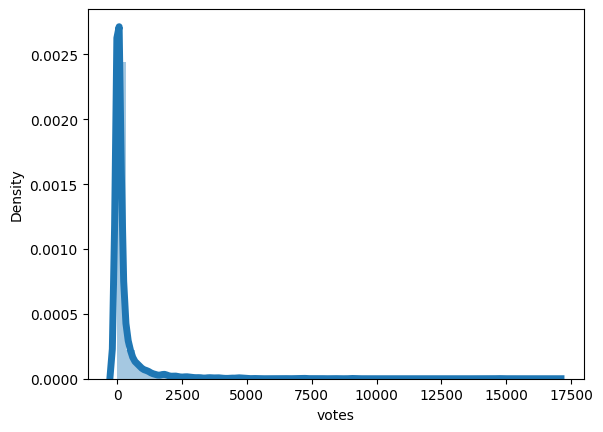

In [32]:
sns.distplot(df['votes'], kde=True, hist=True, kde_kws={'linewidth': 5})
plt.ylabel('Density')
plt.show()


#### Visualising the Online Ordering

online_order
Yes    30311
No     21155
Name: count, dtype: int64

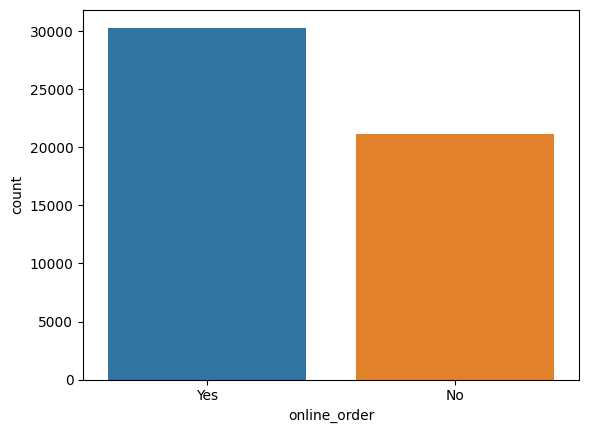

In [33]:
sns.countplot(data = df, x=df['online_order'])

#count the frequency of yes and no in online_order
df['online_order'].value_counts()


#### Visualising table booking availabality

book_table
No     45017
Yes     6449
Name: count, dtype: int64

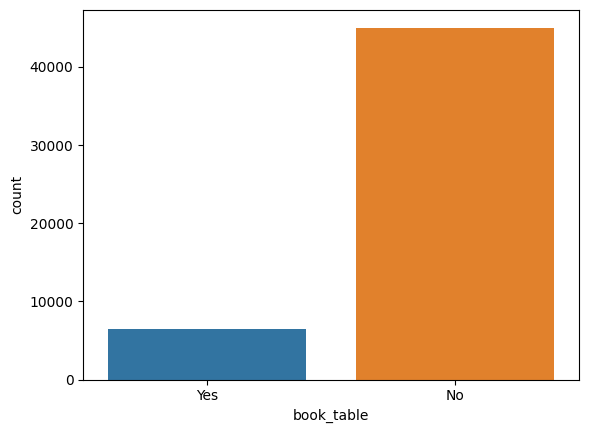

In [34]:
#Visaulise table booking availability
sns.countplot(data = df, x=df['book_table'])

df['book_table'].value_counts()

### Visualising the Cuisines

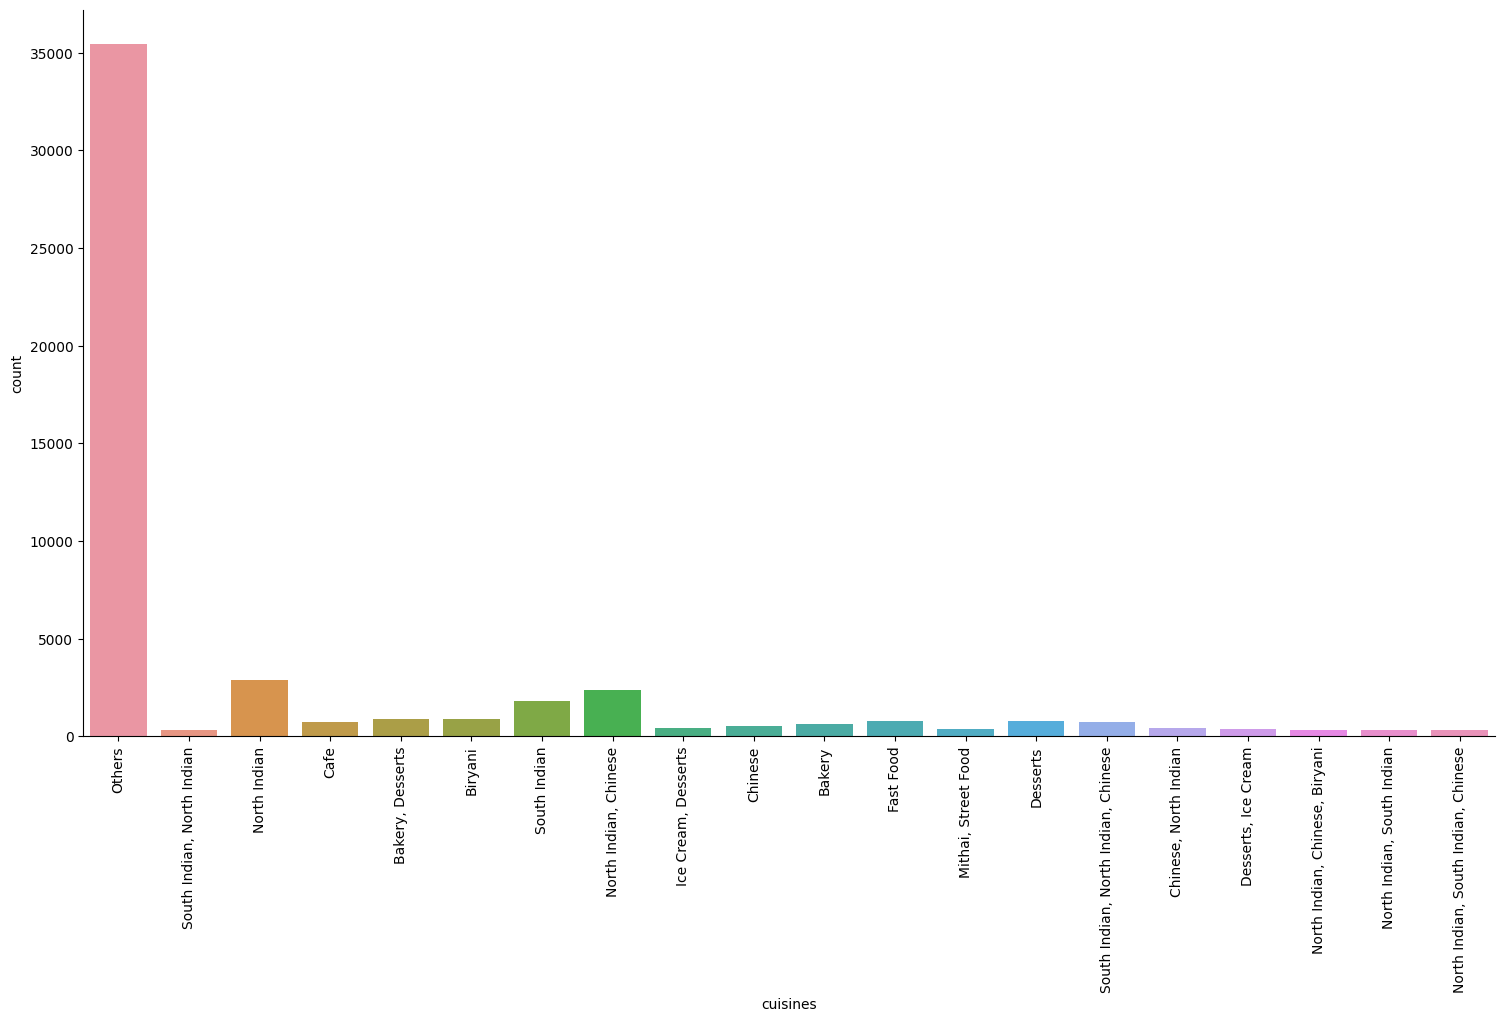

In [35]:
sns.catplot(x='cuisines', kind='count', data=df, height=8, aspect=2)
plt.xticks(rotation=90)
plt.show()



#### Visualiing the approx_cost column

C:\Users\MSI\AppData\Local\Temp\ipykernel_7232\1292515835.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['approx_cost(for two people)'])


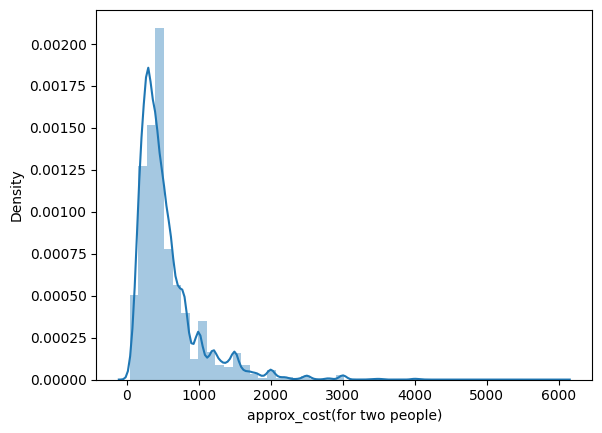

In [36]:
#Visualise the approx_cost(for two people) column
sns.distplot(df['approx_cost(for two people)'])
plt.show()


#### Visualising the listed_in column

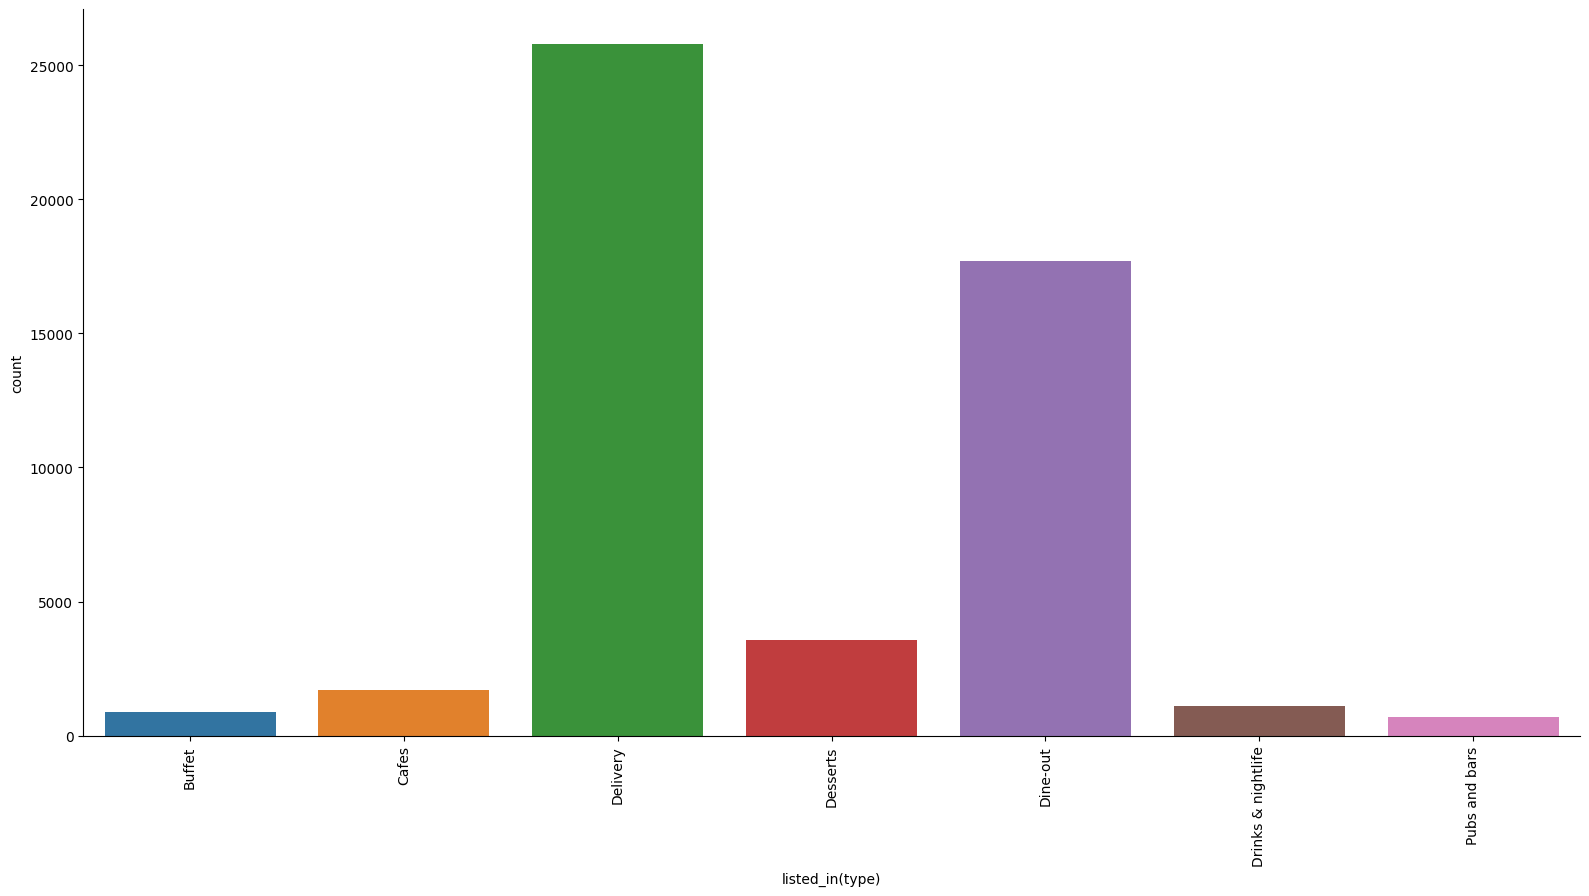

In [37]:
#Visualise the listed_in column
sns.catplot(x='listed_in(type)', kind='count', data=df, height=8, aspect=2)
plt.xticks(rotation=90)
plt.show()

## Bivariate Analysis

### Exploring the relationship between Rating and Number of Votes

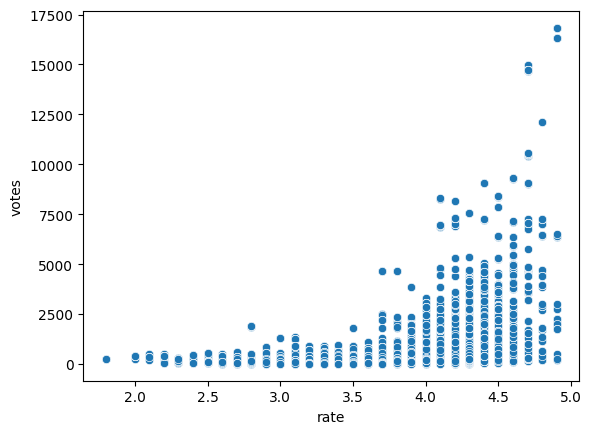

In [38]:
#Explore the relationship between rating and votes
sns.scatterplot(x='rate', y='votes', data=df)
plt.show()


In [39]:
df['rate'].corr(df['votes'])

#The correlation is 0.43 and the diagram shows that there is a positive correlation between the two variables
#Which indicates that the higher the rating, the higher the votes. This is logical since people will vote for a restaurant they like.

0.42787282400330157

#### Exploring the relationship between Rating and approx_cost

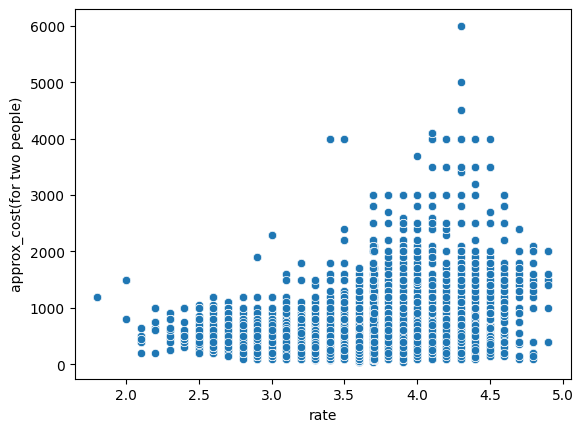

In [40]:
#Explore the relationship between rating and approx_cost(for two people)
sns.scatterplot(x='rate', y='approx_cost(for two people)', data=df)
plt.show()



In [41]:
df['rate'].corr(df['approx_cost(for two people)'])
#The correlation is 0.36 and the diagram shows that there is a positive correlation between the two variables
#Which indicates that the higher the rating, the higher the cost. This is logical since people will pay more for a restaurant they like.

0.3651752143610107

### Exploring the relationship between Rating and Online Ordering

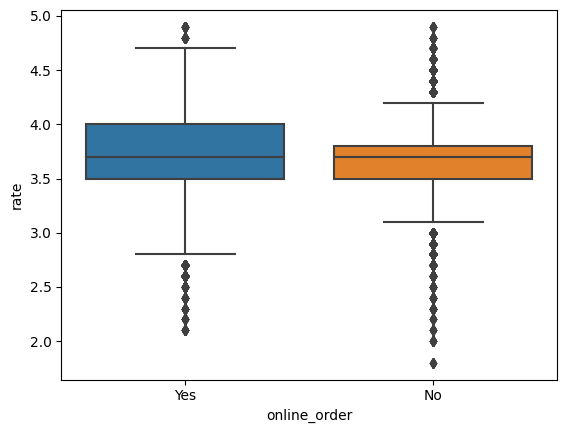

In [42]:
#Exploring the relationship between rating and online_order
sns.boxplot(x='online_order', y='rate', data=df)
plt.show()


### Exploring the relationship between Rating and Table Booking

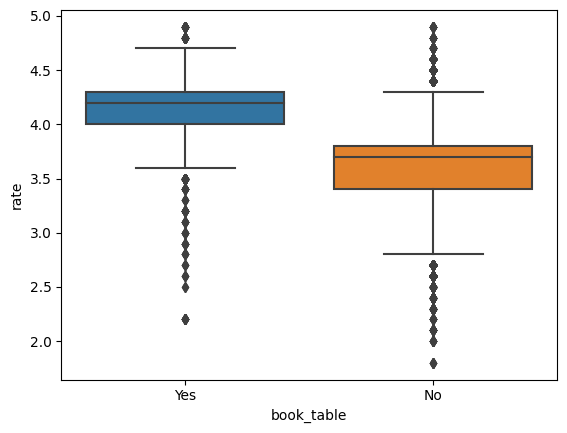

In [43]:
#Exploring the relationship between rating and book_table
sns.boxplot(x='book_table', y='rate', data=df)
plt.show()


#### Exploring the relationship between Cuisines and Listed_in


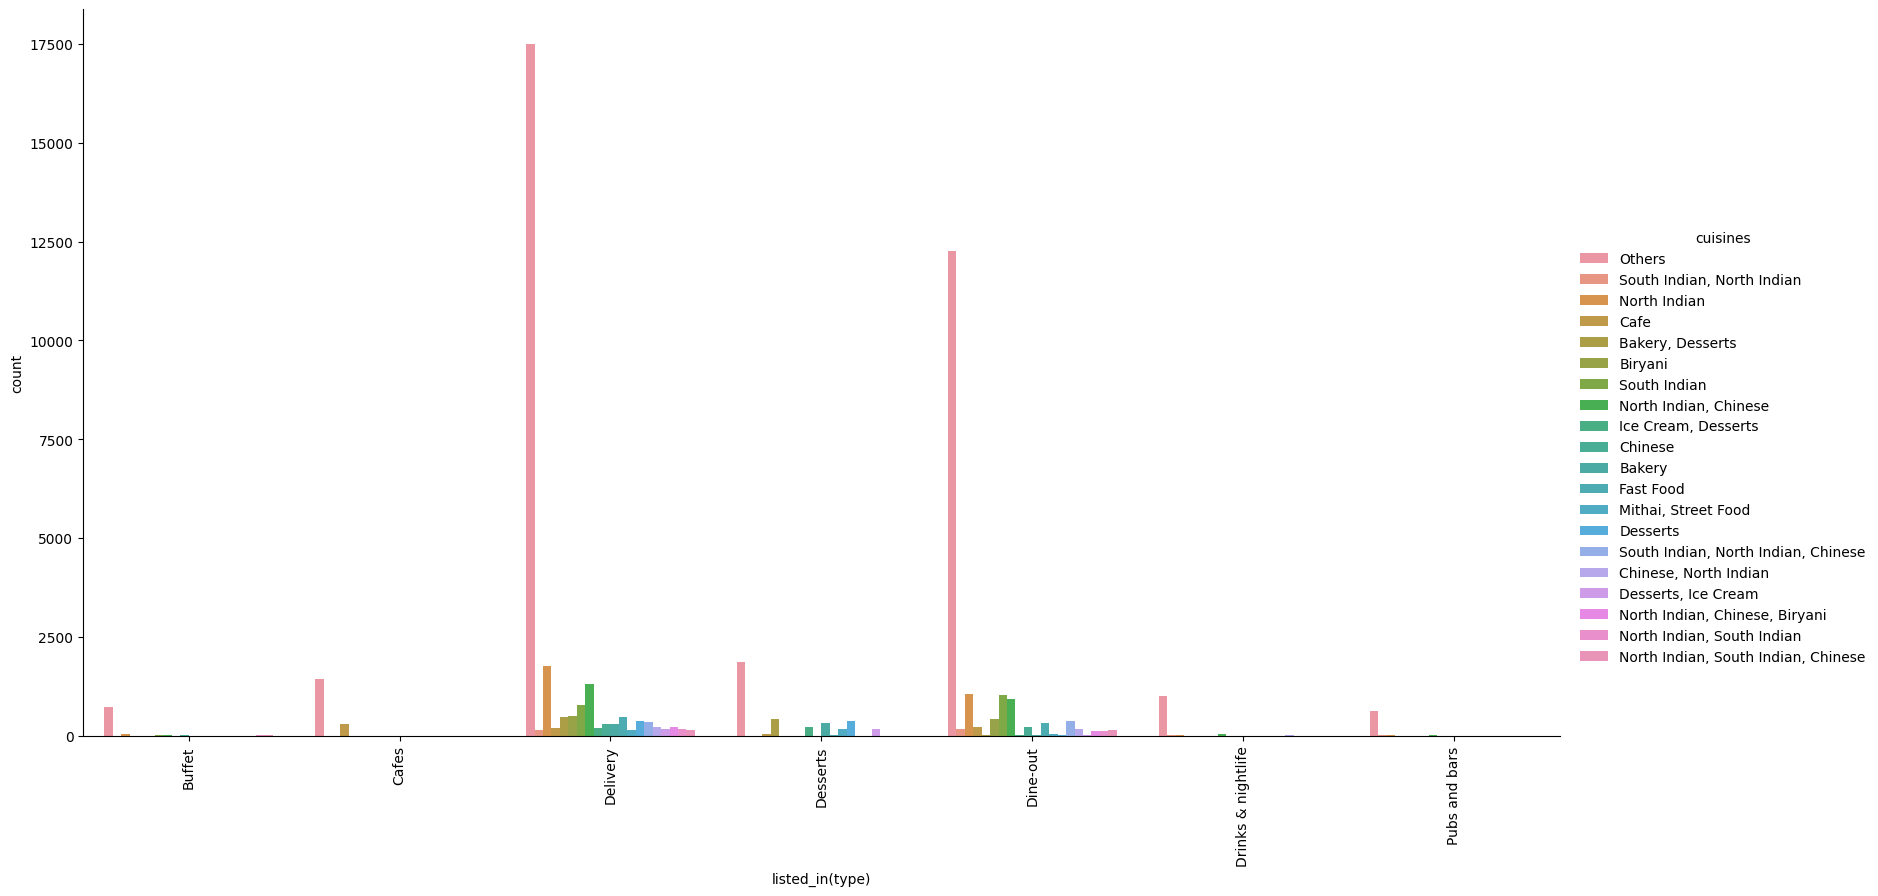

In [44]:
#Exploring the relationship between cuisines and listed_in(type)

sns.catplot(x='listed_in(type)', kind='count', data=df, height=8, aspect=2, hue='cuisines')
plt.xticks(rotation=90)
plt.show()


price_range  rate    
Low          3.702154    8644
             3.700000    2650
             3.600000    2491
             3.800000    2339
             3.900000    2219
                         ... 
Very High    2.800000       0
             2.700000       0
             2.600000       0
             2.500000       0
             2.400000       0
Name: count, Length: 128, dtype: int64

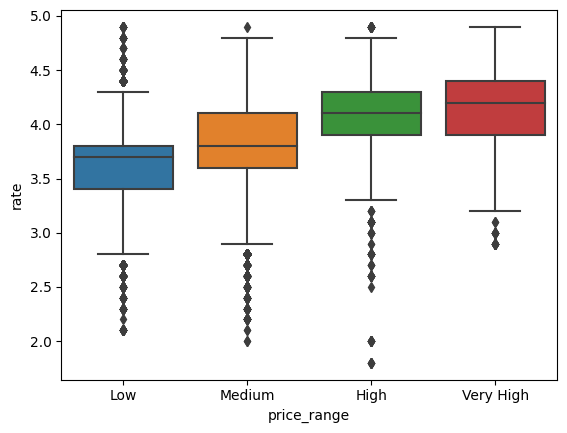

In [45]:
# Feature Engineering: Price Range
df['price_range'] = pd.cut(df['approx_cost(for two people)'], bins=[0, 500, 1000, 1500, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])

# Calculating correlation between Price Range and Rating
correlation = df['rate'].corr(df['price_range'].cat.codes)

# Plotting the correlation
sns.boxplot(x='price_range', y='rate', data=df)

#Count the frequency rating of price range
df.groupby('price_range')['rate'].value_counts()


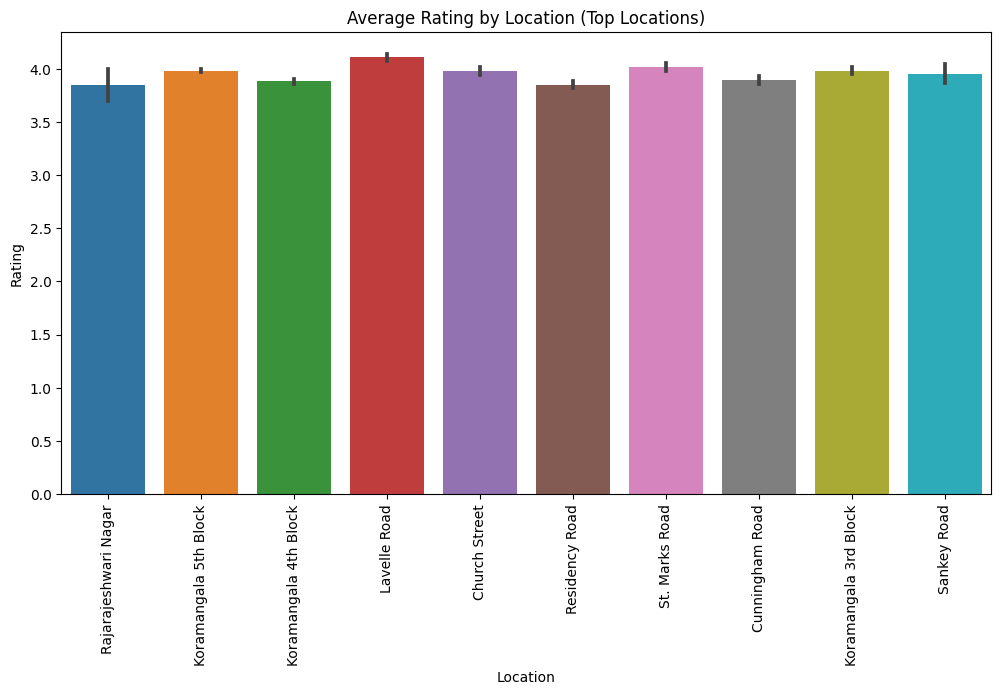

In [46]:
plt.figure(figsize=(12, 6))

# Filtering the DataFrame for locations with the highest ratings
top_locations = df.groupby('location')['rate'].mean().nlargest(10).index
df_top_locations = df[df['location'].isin(top_locations)]

# Plotting the relationship between location and rating for the filtered DataFrame
sns.barplot(x='location', y='rate', data=df_top_locations)

plt.xticks(rotation=90)

plt.xlabel('Location')
plt.ylabel('Rating')
plt.title('Average Rating by Location (Top Locations)')

# Display the plot
plt.show()


## Feature Engineering

### Based on the results above:
1. We can drop the url, address, phone, dish_liked, menu_item columns as they are not useful for our analysis.
2. There seems to be correlations between:
    - approx_cost and rating
    - online_order and rating
    - table_booking and rating
    - cuisines and listed_in(type)
3. We will create a new feature called success score based on the correlations found.


In [47]:
#drop the url, address and menu_item columns
df.drop(['url','address','menu_item'],axis=1,inplace=True)



### Creating the variable success_score based on the correlations found
### It will be the (rating * votes) + (rating * approx_cost) + (online_order + table_booking)

In [48]:
# Feature Engineering: Location Success Score
location_success = df.groupby('location')['rate'].mean().reset_index()
location_success.rename(columns={'rate': 'location_success_score'}, inplace=True)

# Merge the location_success DataFrame with the original DataFrame
df = pd.merge(df, location_success, on='location', how='left')

# Feature Engineering: Success Score
df['success_score'] = (df['rate'] * df['votes']) + (df['rate'] * df['approx_cost(for two people)']) + (df['online_order'].map({'Yes': 1, 'No': 0})) + (df['book_table'].map({'Yes': 1, 'No': 0})) + df['location_success_score']

# Display the updated DataFrame
print(df[['name', 'rate', 'votes', 'approx_cost(for two people)', 'online_order', 'book_table', 'location_success_score', 'success_score']])

                                                    name      rate  votes  \
0                                                  Jalsa  4.100000    775   
1                                         Spice Elephant  4.100000    787   
2                                        San Churro Cafe  3.800000    918   
3                                  Addhuri Udupi Bhojana  3.700000     88   
4                                          Grand Village  3.800000    166   
...                                                  ...       ...    ...   
51461  Best Brews - Four Points by Sheraton Bengaluru...  3.600000     27   
51462                           Vinod Bar And Restaurant  3.702154      0   
51463  Plunge - Sheraton Grand Bengaluru Whitefield H...  3.702154      0   
51464  Chime - Sheraton Grand Bengaluru Whitefield Ho...  4.300000    236   
51465                       The Nest - The Den Bengaluru  3.400000     13   

       approx_cost(for two people) online_order book_table  \
0            

In [49]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),price_range,location_success_score,success_score
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Others,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Medium,3.659120,6463.159120
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Others,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Medium,3.659120,6511.359120
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Others,Others,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Medium,3.659120,6533.059120
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Low,3.659120,1439.259120
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,Others,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Medium,3.675134,2914.475134


## Data Modelling and Evaluation

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51466 entries, 0 to 51465
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   name                         51466 non-null  object  
 1   online_order                 51466 non-null  object  
 2   book_table                   51466 non-null  object  
 3   rate                         51466 non-null  float64 
 4   votes                        51466 non-null  int64   
 5   location                     51466 non-null  object  
 6   rest_type                    51466 non-null  object  
 7   cuisines                     51466 non-null  object  
 8   approx_cost(for two people)  51466 non-null  float64 
 9   reviews_list                 51466 non-null  object  
 10  listed_in(type)              51466 non-null  object  
 11  price_range                  51466 non-null  category
 12  location_success_score       51466 non-null  float64 
 13  s

### We have categorical data that needs encoding

In [52]:
#encode the categorical variables such as online_order, book_table which are Yes or No
#encode the price_range which are Low, Medium, High, Very High

df['price_range'] = df['price_range'].map({'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3})
df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})
df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})



### We will try and classify if restaurants are successful or not based on the success_score

In [53]:
#calculate the mean of success score
df['success_score'].mean()

3316.5587520746494

In [54]:
#Create a new binary column 'success' based on the mean of success score
df['Target'] = df['rate'].apply(lambda x: 1 if x >= 3.75 else 0)

In [55]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),price_range,location_success_score,success_score,Target
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,Others,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,1,3.659120,6463.159120,1
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,Others,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,1,3.659120,6511.359120,1
2,San Churro Cafe,1,0,3.8,918,Banashankari,Others,Others,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,1,3.659120,6533.059120,1
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,0,3.659120,1439.259120,0
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,Others,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,1,3.675134,2914.475134,1


### We will now try to predict the success of a restaurant based on the success (dependent on success_score)

### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#Feature selection
X = df[['rate', 'votes', 'price_range', 'online_order', 'success_score']]
y = df['Target']

#Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Logistic regression model
model = LogisticRegression()

#Fitting the model
model.fit(X_train, y_train)

#Making predictions on the testing data
y_pred = model.predict(X_test)

#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

#evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)


Accuracy: 0.8355352632601516
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      6181
           1       0.82      0.75      0.78      4113

    accuracy                           0.84     10294
   macro avg       0.83      0.82      0.83     10294
weighted avg       0.83      0.84      0.83     10294



c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2.head(25)

,Actual,Predicted
385,0,0
43531,1,1
39940,1,1
31917,0,0
4046,0,0
26896,0,0
10172,0,0
28858,1,1
27091,0,0
7621,0,0


### Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Feature selection
X = df[['rate', 'votes', 'price_range', 'online_order', 'success_score']]
y = df['Target']

#Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Gaussian Naive Bayes model
model = GaussianNB()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

#evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)



Accuracy: 0.8036720419661939
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86      6181
           1       0.92      0.56      0.69      4113

    accuracy                           0.80     10294
   macro avg       0.84      0.76      0.77     10294
weighted avg       0.83      0.80      0.79     10294



In [59]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2.head(25)


,Actual,Predicted
385,0,0
43531,1,1
39940,1,0
31917,0,0
4046,0,0
26896,0,0
10172,0,0
28858,1,0
27091,0,0
7621,0,0


In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Feature selection
X = df[['rate', 'votes', 'price_range', 'online_order', 'success_score']]
y = df['Target']

#Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Decision Tree Classifier
model = DecisionTreeClassifier()

#Fitting the model to the training data
model.fit(X_train, y_train)

#Making predictions on the testing data
y_pred = model.predict(X_test)

#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

#evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)



Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6181
           1       1.00      1.00      1.00      4113

    accuracy                           1.00     10294
   macro avg       1.00      1.00      1.00     10294
weighted avg       1.00      1.00      1.00     10294



In [61]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2.head(25)


,Actual,Predicted
385,0,0
43531,1,1
39940,1,1
31917,0,0
4046,0,0
26896,0,0
10172,0,0
28858,1,1
27091,0,0
7621,0,0
